# Crowd Funding Study: Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#pd.set_option('display.max_columns', None) #display all columns in jupyter
df= pd.read_csv('scrapedCrowdOfferingsData.csv',index_col=None)

C:\Users\apsin\AppData\Local\Temp\ipykernel_6860\1480657344.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('scrapedCrowdOfferingsData.csv',index_col=None)


In [3]:
df.dtypes

accessionNumber                      object
compensationAmount                   object
financialInterest                    object
securityOfferedType                  object
securityOfferedOtherDesc             object
noOfSecurityOffered                 float64
price                               float64
priceDeterminationMethod             object
targetOfferingAmount                float64
oversubscriptionAccepted             object
oversubscriptionAllocationType       object
oversubscriptionDesc                 object
maximumOfferingAmount               float64
campaignDeadlineDate                 object
currentEmployees                    float64
totalAssetMostRecentFiscalYear      float64
totalAssetPriorFiscalYear           float64
cashEqMostRecentFiscalYear          float64
cashEqPriorFiscalYear               float64
accountsReceivedRecentFiscalYear    float64
accountsReceivedPriorFiscalYear     float64
shortTermDebtMRecentFiscalYear      float64
shortTermDebtPriorFiscalYear    

In [4]:
df['dateIncorporation']= pd.to_datetime(df['dateIncorporation']).dt.date #converting to datetime type
df['campaignDeadlineDate']= pd.to_datetime(df['campaignDeadlineDate']).dt.date
df['isAmendment']= df['isAmendment'].astype('bool')
df['filingDate'].head(3) # taking a close look since it was an integer type


0    20230630
1    20230630
2    20230630
Name: filingDate, dtype: int64

In [5]:
df['filingDate']= pd.to_datetime(df['filingDate'], format='%Y%m%d').dt.date #specify the format of the date in this case
df['filingDate'].head(3)

0    2023-06-30
1    2023-06-30
2    2023-06-30
Name: filingDate, dtype: object

A lot of the object column types e.g. compensationAmount, financialInterest, intuitively should be numerical columns so let's look into object columns with more detail

In [6]:
filter_notna_selectedColumns= df[['compensationAmount', 'financialInterest']].notna().all(axis=1) #filtering rows where selected cols have non null values 
df[filter_notna_selectedColumns].select_dtypes(['object']).head(3)

,accessionNumber,compensationAmount,financialInterest,securityOfferedType,securityOfferedOtherDesc,priceDeterminationMethod,oversubscriptionAccepted,oversubscriptionAllocationType,oversubscriptionDesc,campaignDeadlineDate,...,dateIncorporation,city,stateOrCountry,zipCode,issuerWebsite,IntermediaryName,isCoIssuer,submissionType,filingDate,fileNumber
1,0001781955-23-000008,3.5% of final raise amount paid to PicMii Crow...,None.,Common Stock,NaN,At issuer's discretion.,Y,"First-come, first-served basis",NaN,2023-08-01,...,2019-04-16,HACKETTSTOWN,NJ,07840,www.domeaudioinc.com,PicMii Crowdfunding LLC,N,C/A,2023-06-30,020-28102
2,0001669191-23-000655,Up to 4.9% of amount raised for a successful o...,None.,Common Stock,NaN,The price of the Securities was determined sol...,Y,"First-come, first-served basis",NaN,2023-08-31,...,2021-11-22,Boston,MA,02110,https://custcorp.com/,NetCapital Funding Portal Inc.,N,C/A,2023-06-30,020-29958
3,0001669191-23-000656,Up to 4.9% of amount raised for a successful o...,None.,Common Stock,NaN,The price of the Securities was determined sol...,Y,"First-come, first-served basis",NaN,2023-09-29,...,2007-09-10,Hollister,CA,95023,https://www.lightningmotorcycle.com,NetCapital Funding Portal Inc.,N,C/A,2023-06-30,020-32002


### **Dropping columns**
    - Seems like compensation amount, priceDeterminationMethod is in text form, and there is no clear uniform consistency to extract features from.
    - The financial interest is also in text form, a derived boolean column in the form of yes/no to include this feature in model if required later but for now we drop it.

In [7]:

df.drop(columns=['compensationAmount','financialInterest'],axis=1, inplace=True)

In [8]:
df.loc[df['progressUpdate'].notnull(),'progressUpdate'].head(5) # checking non null values from the column 'progressUpdate'

7          The issuer closed on $250,000 of debt notes.
27    The issuer closed on $32,000 of SAFEs. The fun...
43    The final number is $231,205.00 in investments...
44    At the close of the offering, the issuer close...
49    Adjustment to the initial Form C-U filing of 0...
Name: progressUpdate, dtype: object


**Progress update is in text form but seems like this is where the data for raisedOfferingAmount would come for after some processing so will not drop it**

In [9]:
cardinality= df.select_dtypes(['object']).nunique()
print(cardinality)


accessionNumber                   23474
securityOfferedType                   4
securityOfferedOtherDesc            604
priceDeterminationMethod           1307
oversubscriptionAccepted              2
oversubscriptionAllocationType        3
oversubscriptionDesc                162
campaignDeadlineDate               2092
progressUpdate                     3382
natureOfAmendment                  5043
issuerName                         7420
legalStatusForm                       6
legalStatusOtherDesc                 25
jurisdictionOrganization             53
dateIncorporation                  2916
city                               2674
stateOrCountry                       70
zipCode                            3442
issuerWebsite                      7682
IntermediaryName                    209
isCoIssuer                            2
submissionType                       11
filingDate                         1756
fileNumber                         7319
dtype: int64


In [10]:
(df.isna().sum()/len(df))*100 #percentage of nan values in each column

accessionNumber                      0.000000
securityOfferedType                 20.456675
securityOfferedOtherDesc            65.148675
noOfSecurityOffered                 36.014314
price                               24.631507
priceDeterminationMethod            54.319673
targetOfferingAmount                20.456675
oversubscriptionAccepted            20.456675
oversubscriptionAllocationType      21.415183
oversubscriptionDesc                53.527307
maximumOfferingAmount               21.415183
campaignDeadlineDate                20.456675
currentEmployees                     6.500809
totalAssetMostRecentFiscalYear       6.500809
totalAssetPriorFiscalYear            6.500809
cashEqMostRecentFiscalYear           6.500809
cashEqPriorFiscalYear                6.500809
accountsReceivedRecentFiscalYear     6.500809
accountsReceivedPriorFiscalYear      6.500809
shortTermDebtMRecentFiscalYear       6.500809
shortTermDebtPriorFiscalYear         6.500809
longTermDebtRecentFiscalYear      

### Interesting observations
- each of the financials have 6.5% of the total values are Nan indicated a system trend
- No missing values in isAmendment, submissionType, so these can be used as filters
- issuerCIK and issuerName are both have same percentage of missing values, indicating that in a record both these fields are likely missing together
- Some categorical columns can be dropped if cardinality or if the no of missing values are high: ['compensationAmount', 'financialInterest',
       'securityOfferedOtherDesc', 'priceDeterminationMethod', 'oversubscriptionDesc', 'legalStatusOtherDesc','jurisdictionOrganization',
       'city','zipCode', 'issuerWebsite']
- IssuerCIK is unique to IssuerName and as such doesn't provide any additional information so can be dropped as well.

In [11]:
columns_to_drop= ['securityOfferedOtherDesc', 'priceDeterminationMethod', 'oversubscriptionDesc', 'legalStatusOtherDesc'
,'jurisdictionOrganization','city','zipCode', 'issuerWebsite', 'issuerCIK']
df.drop(columns=columns_to_drop, axis=1,inplace=True)

## Submission Type Context

Description of the various categories in submissionType is available at https://www.sec.gov/dera/data/crowdfund.pdf

- C (Offering Statement): If the crowdfunding campaign was launched, but no funds were raised, the initial offering statement would have been filed. However, this may not necessarily be updated if no funds are raised.
- C-W (Offering Statement Withdrawal): If the issuer decides to cancel the crowdfunding campaign before raising any funds, they may file a withdrawal of the offering statement (C-W).
- C-U (Progress Update): Provides progress updates of the campaign.
- C-U-W (Progress Update Withdrawal): If the issuer initially filed a progress update (C-U) but later decides to withdraw it, they can file a withdrawal (C-U-W).
- C/A (Amendment to Offering Statement): If the issuer initially filed an offering statement (C) and then decided to make material changes or updates related to the campaign, they may file an amendment (C/A). However, this is less likely in the case of a failed campaign.
- C/A-W (Amendment to Offering Statement Withdrawal):If an issuer submitted an amendment to the offering statement (C/A) but later decided to withdraw it, they could file a withdrawal (C/A-W).
- C-AR (Annual Report): An annual report (C-AR) is typically filed by issuers who have successfully raised funds and continue to operate. It's less relevant if no funds were raised.
- C-AR-W (Annual Report Withdrawal): If an issuer filed an annual report (C-AR) but later decided to withdraw it, they could file a withdrawal (C-AR-W).
- C-AR/A (Amendment to Annual Report): An issuer may file an amendment (C-AR/A) to the annual report if there are material changes or updates to the previously submitted annual report. This is less likely in the case of a failed campaign.
- C-AR/A-W (Amendment to Annual Report Withdrawal): If an issuer submitted an amendment to the annual report (C-AR/A) but later decided to withdraw it, they could file a withdrawal (C-AR/A-W).
- C-TR (Termination of Reporting): If an issuer decides to cease ongoing reporting obligations to the SEC, they may file a termination of reporting (C-TR). This could apply if the campaign failed, and they no longer wish to provide updates.
- C-TR-W (Termination of Reporting Withdrawal): If an issuer initially filed a termination of reporting (C-TR) but later decided to withdraw it, they could file a withdrawal (C-TR-W).

### Defining some new features that might provide value to model


In [12]:
def additionalFeatures(group):
    
    # This sorting ensures that iloc[0] corresponds to latest filing dates, and iloc[-1] to earliest filing
    group= group.sort_values(by=['filingDate','accessionNumber'], ascending=[False, False]) # for cases where filing Dates are same, accessionNumber is used to sort

    group['accessionNumber']= group['accessionNumber'].iloc[-1] #earliest accession number or the first filing will be the reference for a campaign
    group['firstFilingSubmissionType']= group['submissionType'].iloc[-1]

    #Determing the quarter of the first filing Date of a campaign for capturing seasonality
    group['quarter']= str(pd.to_datetime(group['filingDate']).iloc[-1].quarter)+'Q'
    
    if group['targetOfferingAmount'].notna().any(): #checking for non-empty rows of targetOfferingAmount in this group
        group['finalTargetOffering']=  group.loc[group['targetOfferingAmount'].notna(), 'targetOfferingAmount'].iloc[0] #the latest non-empty targetOfferingAmount
        group['initialTargetOffering']= group.loc[group['targetOfferingAmount'].notna(), 'targetOfferingAmount'].iloc[-1] # the earliest non-empty targetOfferingAmount
    else:
        group['finalCampaignDeadline']= np.nan
        group['initialCampaignDeadline']= np.nan

    if group['campaignDeadlineDate'].notna().any(): #checking for non-empty rows of campaignDeadlineDate in this group
        group['finalCampaignDeadline']=  group.loc[group['campaignDeadlineDate'].notna(), 'campaignDeadlineDate'].iloc[0] #the latest non-empty campaign deadline date
        group['initialCampaignDeadline']= group.loc[group['campaignDeadlineDate'].notna(), 'campaignDeadlineDate'].iloc[-1] # the earliest non-empty campaign deadline date
    else:
        group['finalCampaignDeadline']= np.nan
        group['initialCampaignDeadline']= np.nan
    
    if group['dateIncorporation'].notna().any(): #checking for non-empty rows of dateIncorporation in this group
        non_empty_rows= group.loc[group['dateIncorporation'].notna(), 'dateIncorporation'] #filtering non empty rows of dateIncorporation to select the earliest (iloc[-1]) recorded dateIncorporation 
        group['companyAge']= (pd.to_datetime(group['filingDate'].iloc[-1]) - pd.to_datetime(non_empty_rows.iloc[-1])).days # Age of company in days at its first filing date w/r dateIncorporation
    else:
        group['companyAge']= np.nan # assigning nan to all companies, where dateIncorporation is not available

    group['countFilings']= group['submissionType'].count() #count no of total filings
    
    if not group[group['submissionType']== 'C-U'].empty:
        group['latestProgressUpdate']= group.loc[group['submissionType']== 'C-U','progressUpdate'].iloc[0] # latest progress update corresponds to latest accessionNumber  
        group['countProgressUpdates']= len(group[group['submissionType']== 'C-U']) #count no of progress updates
    else:
        group['latestProgressUpdate']= 'unknown'  
        group['countProgressUpdates']   = 0

    if not group[group['submissionType']== 'C/A'].empty:
        group['countAmendments']= len(group[group['submissionType']== 'C/A']) #count number of amendments during a campaign if any
    else:
        group['countAmendments'] = 0
    
    return group

df_agg= pd.DataFrame()
grouped_cols= ['fileNumber','accessionNumber','countFilings','countAmendments','countProgressUpdates','latestProgressUpdate'
,'quarter','companyAge','initialTargetOffering','finalTargetOffering','initialCampaignDeadline','finalCampaignDeadline','firstFilingSubmissionType']
df_agg= df.groupby('fileNumber').apply(additionalFeatures)[grouped_cols]


In [13]:
df_agg.duplicated().sum() #corresponding to each row of orignal df, the same aggregated value was assigned resulting in duplicates

16155

In [14]:
df_agg.drop_duplicates(inplace=True)

In [15]:
len(df_agg[~(df_agg['firstFilingSubmissionType']=='C')]) #Exploring cases when the first filing isn't 'C'

2

In [16]:
df_agg[~(df_agg['firstFilingSubmissionType']=='C')]['firstFilingSubmissionType']

fileNumber       
020-23070   23132    C-W
020-26573   7168     C/A
Name: firstFilingSubmissionType, dtype: object

In [17]:
selected_fileNumbers= df_agg[~(df_agg['firstFilingSubmissionType']=='C')]['fileNumber'].tolist()

df.loc[df['fileNumber'].isin(selected_fileNumbers),['fileNumber','filingDate','accessionNumber'
,'submissionType','natureOfAmendment']].sort_values(by=['fileNumber','filingDate','accessionNumber'], ascending=[True, False, False])


,fileNumber,filingDate,accessionNumber,submissionType,natureOfAmendment
23132,020-23070,2016-11-15,0001690042-16-000001,C,NaN
23130,020-23070,2016-11-15,0001669760-16-000095,C-W,NaN
7168,020-26573,2022-04-06,0001812932-22-000002,C-AR,NaN
12357,020-26573,2021-04-05,0001812932-21-000002,C-U,NaN
13212,020-26573,2021-01-28,0001812932-21-000001,C/A,"Extending offering deadline to March 29, 2021 ..."
13948,020-26573,2020-11-23,0001812932-20-000004,C/A,"Extending the offering end date to February 1,..."
15071,020-26573,2020-08-07,0001812932-20-000003,C/A,Adding webinar transcript and updating summary.
15125,020-26573,2020-07-31,0001812932-20-000002,C/A,To extend the offering end date to November 30...
15431,020-26573,2020-06-30,0001816327-20-000003,C,NaN
15426,020-26573,2020-06-30,0001812932-20-000001,C/A,"Updating offering date from June 29, 2020 to J..."


In [255]:
df_agg= df_agg[df_agg['firstFilingSubmissionType']=='C'] # Since only two campaigns don't have firstFilingSubmissionType as 'C' so these rows will be dropped for consistency
df_agg.drop(columns=['firstFilingSubmissionType'], axis=1, inplace=True) #since all rows have firstFilingSubmissionType = C now

In [18]:
# Cases when final campaign date > latest filing date

# The cutoff deadline date is chosen as 30 days prior to the latest filing date in data to account for delays in filing of progress update (submissionType = 'C-U')
cutoff_campaign_deadline= df['filingDate'].max()- dt.timedelta(days=30)
print(f'Cutoff campaign deadline date in data: {cutoff_campaign_deadline}')

excluded_campaigns= df_agg[(df_agg['finalCampaignDeadline']> cutoff_campaign_deadline)]
no_excluded_campaigns= len(excluded_campaigns)
print(f'No of campaigns in data outside of cuttoff campaign deadline date: {no_excluded_campaigns}')

percentWithoutProgressUpdate= 100*len(excluded_campaigns[excluded_campaigns['countProgressUpdates']== 0])/no_excluded_campaigns
print(f'Campaigns with no progress updates amongst the excluded campaigns: {percentWithoutProgressUpdate} %')

df_agg[(df_agg['finalCampaignDeadline']> cutoff_campaign_deadline)].head(5) #sample data from excluded campaigns

Cutoff campaign deadline date in data: 2023-05-31
No of campaigns in data outside of cuttoff campaign deadline date: 634
Campaigns with no progress updates amongst the excluded campaigns: 93.21766561514195 %


,,fileNumber,accessionNumber,countFilings,countAmendments,countProgressUpdates,latestProgressUpdate,quarter,companyAge,initialTargetOffering,finalTargetOffering,initialCampaignDeadline,finalCampaignDeadline,firstFilingSubmissionType
fileNumber,,,,,,,,,,,,,,
020-24160,10,020-24160,0001736388-18-000001,19,10,1,The issuer successfully completed its offering...,2Q,30.0,25000.00,10000.0,2018-07-11,2023-09-05,C
020-26364,387,020-26364,0001669191-20-000225,25,22,1,End of offering. Issuer closed its offering wi...,2Q,897.0,10000.22,10000.0,2020-07-31,2023-06-30,C
020-27456,2298,020-27456,0001833215-21-000001,5,2,1,"$271,000 raised thus far from 35 investors",1Q,55.0,2000.00,2000.0,2021-12-31,2024-01-01,C
020-27507,1529,020-27507,0001827264-21-000007,6,5,0,unknown,1Q,1000.0,1070000.00,100000.0,2021-05-25,2024-02-24,C
020-27674,38,020-27674,0001669191-21-000176,22,21,0,unknown,1Q,300.0,10000.00,10000.0,2021-04-24,2023-08-31,C


In [19]:
df_agg= df_agg[(df_agg['finalCampaignDeadline']<= cutoff_campaign_deadline)] #dropping rows with excluded campaigns

### Text Processing: Obtaining raisedAmount from text data in LatestProgressUpdate 

In [21]:
def extract_words_with_symbol(text):
    words = text.split()
    words_with_symbol = [word for word in words if '$' in word or '%' in word]
    return ' '.join(words_with_symbol)

#df_test['raisedAmount'] = df_agg['latestProgressUpdate'].apply(extract_raised_amount)
def set_raised_amount(row):
    if 'unknown' in row['latestProgressUpdate']:
        return 0
    else:
        return row['raisedAmount']

def correct_percentages_in_raised_amount(row):
   
    
    if isinstance(row['raisedAmount'],str): # only proceed when string
        words= row['raisedAmount'].split()
        
        if any('$' in word for word in words) and any('%' in word for word in words):
            # For example for the case below:
            # "The issuer raised approximately $230,648.0 during the offering period. Payments are still being processed; the exact amount has yet to be determined. The issuer had raised 50% of the target offering by 05/14/22 and 100% by 05/19/22.""
            words_with_dollar= [word for word in words if '$' in word]
            return words_with_dollar[0]

        elif '100%' in words:
            return row['finalTargetOffering']
        elif '50%' in words:
            return row['finalTargetOffering']*0.5
        else:
            return row['raisedAmount']
    else:
        return row['raisedAmount']

def clean_dollar_symbols(row):
    # Does the following changes
    # $995,347.71, -> 995347.71
    # $999,820 $9,950 -> 999820 9950
    # $184,363; $12,905.41; $3,687.26; $171,457.59. -> 184363 12905.41 3687.26 171457.59.
    # $0.06) - > 0.06 
    # $575,000and -> 575000
    # $1.70/share -> 1.70
    # $34,550/ -> 34550
    # $49600.The -> 49600
    # $600k -> 600000
    
    if isinstance(row['raisedAmount'],str): # only proceed when string
        return row['raisedAmount'].replace('$','').replace('and','').replace(',','').replace(';','').replace(')','').replace('/share','').replace('/','').replace('.The','').replace('k','000')
    else:
        return row['raisedAmount']

def clean_periods_from_end(row):
    # Does the following changes
    # 995000. -> 995000
    #90000. 90100 -> 90100 # removes period from end and returns the max of the two values
    number_list=[]
    if isinstance(row['raisedAmount'],str): # only proceed when string
        words = row['raisedAmount'].split()
        for word in words:
            if word[-1]== '.':
                word= word[:-1]
            number_list.append(float(word))
        if number_list:
            return max(number_list)
        else:
            return row['raisedAmount']
     
    else:
        return row['raisedAmount'] #row['raisedAmount']

df_test= pd.DataFrame()
df_test['fileNumber']= df_agg['fileNumber']
df_test['latestProgressUpdate']= df_agg['latestProgressUpdate']
df_test['finalTargetOffering']= df_agg['finalTargetOffering']
df_test['unknownProgressUpdate']= df_test['latestProgressUpdate'].apply(lambda x: 1 if 'unknown' in x else 0)
print(f"no of campaigns without progress update filings for raised amount:{df_test['unknownProgressUpdate'].sum()} out of total campaigns: {len(df_test['latestProgressUpdate'])}")
df_test['raisedAmount'] = df_test['latestProgressUpdate'].apply(extract_words_with_symbol)
df_test['raisedAmount']= df_test.apply(set_raised_amount, axis=1)
df_test['raisedAmount']=  df_test.apply(correct_percentages_in_raised_amount, axis=1)
df_test['raisedAmount']=  df_test.apply(clean_dollar_symbols, axis=1)
df_test['raisedAmount']=  df_test.apply(clean_periods_from_end, axis=1)
df_test['raisedAmount']= pd.to_numeric(df_test['raisedAmount'])


# Look into the nan cases
# , especially End of offering. Does this mean the the prior C-U had the numerical data?
# combine df_test with df_agg



no of campaigns without progress update filings for raised amount:3637 out of total campaigns: 6684


In [49]:
# These nan values (118 in total) are to be cleaned later, but for now we fill them with zeros
# Ensure that the latest progress update is the correct one, even for cases like 'the offering ended'
#df_test['raisedAmount'].isna().sum()

df_test['raisedAmount'].fillna(0, inplace=True)

#reseting indexes 
df_agg.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_agg= pd.merge(df_agg, df_test[['fileNumber','unknownProgressUpdate','raisedAmount']], on=['fileNumber'],how='left')


In [50]:
#sns.heatmap(df_agg.isnull(),cbar='False')
(df_agg.isna().sum()/len(df_agg))*100


fileNumber                   0.0
accessionNumber              0.0
countFilings                 0.0
countAmendments              0.0
countProgressUpdates         0.0
latestProgressUpdate         0.0
quarter                      0.0
companyAge                   0.0
initialTargetOffering        0.0
finalTargetOffering          0.0
initialCampaignDeadline      0.0
finalCampaignDeadline        0.0
firstFilingSubmissionType    0.0
unknownProgressUpdate        0.0
raisedAmount                 0.0
dtype: float64

<AxesSubplot:>

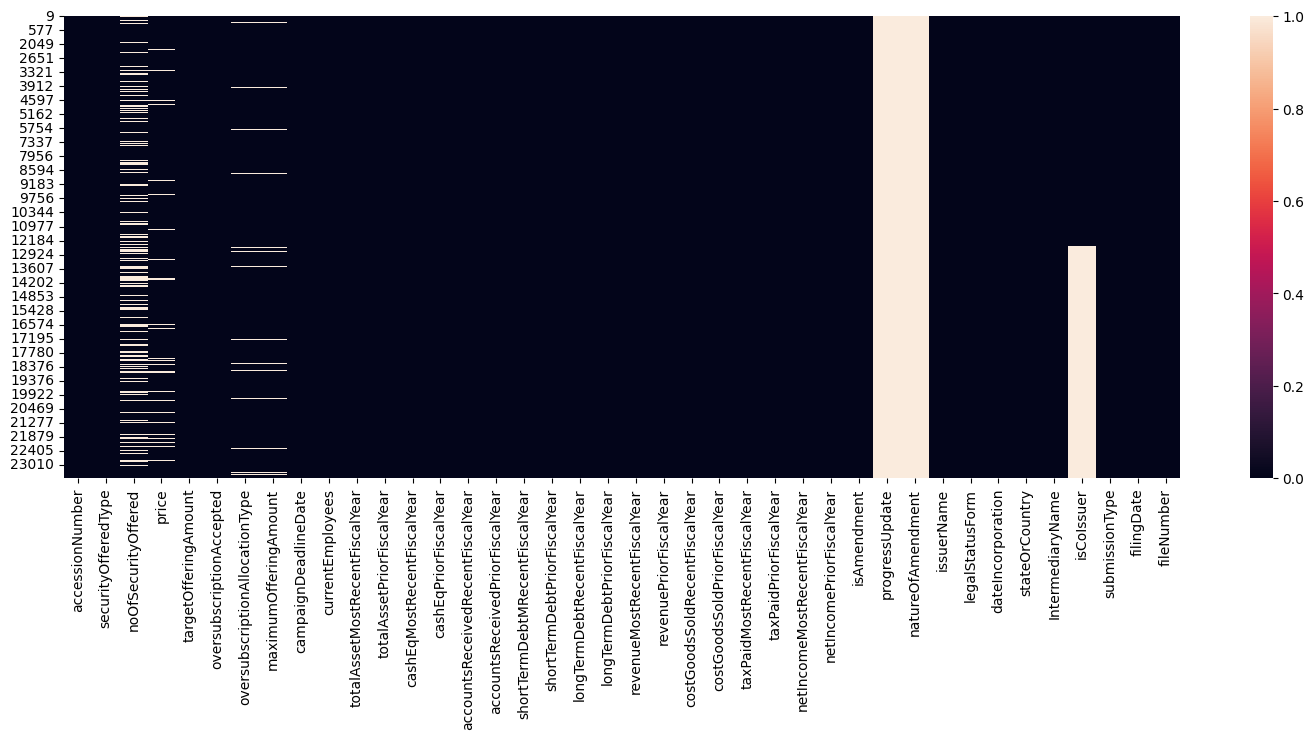

In [51]:
plt.figure(figsize=(18, 6)) 
sns.heatmap(df[df['submissionType']=='C'].isnull()) # heat map of null values in the 'C' filings


### Dealing with Missing Values in first Form-C of a campaign
#### Dropping Columns
- progressUpdate information were captured in df_agg['latestProgressUpdate'] -> drop
- isAmendment, natureOfAmendment information were captured in df_agg['countAmmendments'] -> drop
- Similarly, campaignDeadlineDate and targetOfferingAmount are also captured in df_agg -> drop
- Nearly 50% of isCoIssuer is missing -> drop

#### Forward Filling
The rest can be forward filled so that if any later filings of the same campaign has non-null values it can be used to fill the earlier filings

In [53]:
df.drop(columns=['progressUpdate','isCoIssuer','isAmendment','natureOfAmendment','campaignDeadlineDate','targetOfferingAmount'],inplace=True) #drop columns

In [54]:
def forward_fill_group(group): # since each group is the same campagin, the forward filling will be only with values from the same campaign 
    group = group.sort_values(by=['filingDate', 'accessionNumber'], ascending=[False, False])
    group.ffill(inplace=True)
    return group

# Group the DataFrame by 'fileNumber' and apply the custom forward-fill function
df = df.groupby('fileNumber').apply(forward_fill_group).reset_index(drop=True)
df= df[df['submissionType'] == 'C']  # also only filtering rows C or first filings and dropping the rest

In [55]:
df.drop(columns=['submissionType'], inplace=True) #since the entire dataset now contains only 'C'

<AxesSubplot:>

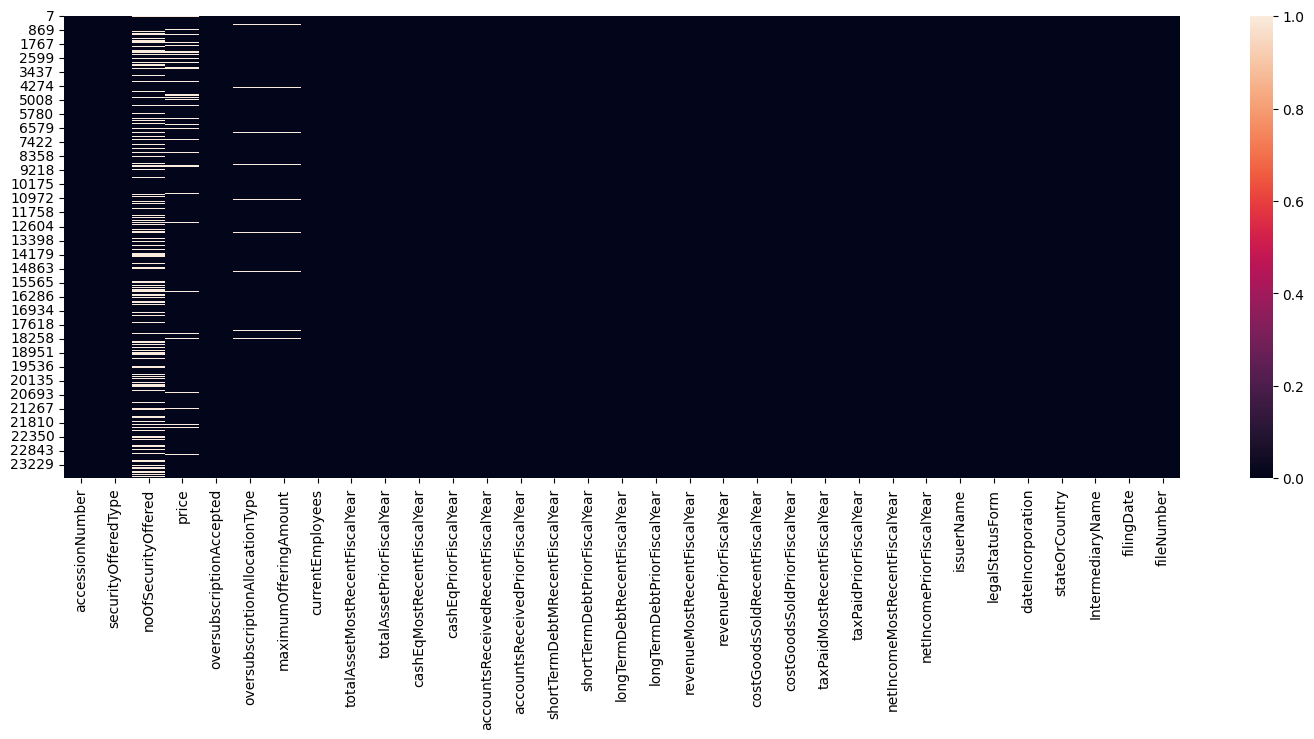

In [56]:
plt.figure(figsize=(18, 6)) 
sns.heatmap(df.isnull()) # heat map of null values in the 'C' filings

In [57]:
df_agg= pd.merge(df_agg,df, on=['fileNumber','accessionNumber'],how='inner') #the final Aggregated and cleaned data for modeling


In [59]:
df_agg.to_csv('CrowdFundingCampaignsCleanedData.csv', index=False) 

In [ ]:
# Since the model planned will be based on initial offering financials, so data from the first filing (submissionType= C) of a compaign will be used
# However, if columns of a first filing are empty then latest non-zero value of the campaign will be used. The reason, this approximation is better than taking the mean or mode of all campaign values
